<a href="https://colab.research.google.com/github/jh941213/DeepLearing/blob/main/CNNMnist_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip uninstall tensorflow
# Proceed (y/n)? 나오면 y입력

!pip install tensorflow==1.14

#/RESTART RUNTIME 클릭 


#버전 확인
import tensorflow as tf
print(tf.__version__)

Found existing installation: tensorflow 2.9.2
Uninstalling tensorflow-2.9.2:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.9.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? n
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109.3 MB 51 kB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
     |████████████████████████████████| 3.1 MB 47.4 MB/s 
     |████████████████████████████████| 488 kB 57.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
  

2.9.2


In [11]:
#module
#keras 딥러닝 모델을 만들기 위한 고성능
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import (Dense, BatchNormalization, Dropout) 
from tensorflow.keras.datasets.mnist import load_data

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 


In [12]:
(train_image, train_labels), (test_image, test_labels)= load_data() #data set 다운로드

In [13]:
train_image.shape #트레인 6만개 28*28 개의 데이터
test_image.shape #테스트 1만개 28*28 개의 데이터
train_labels.shape #6만개
test_labels.shape #만개

(10000,)

In [16]:
def show_images(dataset, label, nrow, ncol):
    #캔버스 설정
    fig, axes = plt.subplots(nrows = nrow, ncols = ncol, figsize=(2*ncol, 2*nrow))
    ax = axes.ravel()

    xlabels = label[0:nrow*ncol]

    for i in range(nrow*ncol):

        image = dataset[i]
        ax[i].imshow(image, cmap='gray')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_xlabel(xlabels[i])

    plt.tight_layout()
    plt.show()



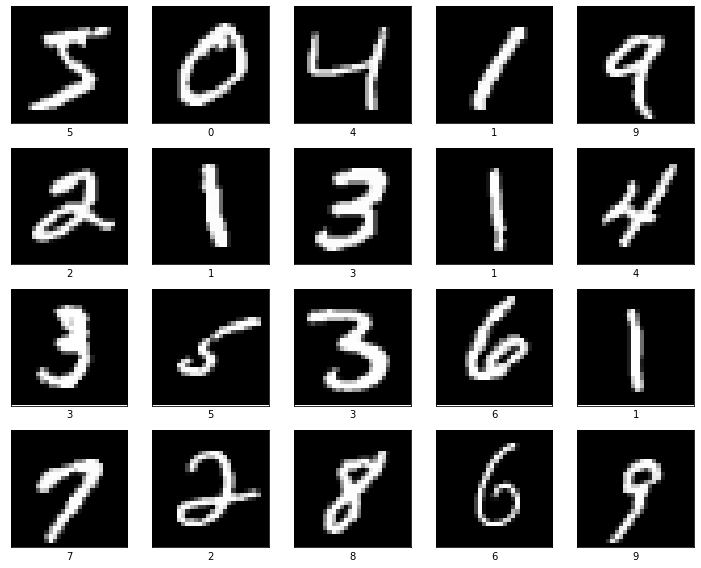

In [17]:
show_images(train_image, train_labels, 4, 5)

In [19]:
print(train_image[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18